# Steven Coutts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data= pd.read_csv('titanic.csv')
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df = pd.DataFrame(data)
df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],1)
sv = df['Survived']
df.drop(labels=['Survived'], axis=1,inplace = True)
df.insert(6, 'Survived', sv)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [5]:
#I got the code for this from:
#https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

gender = {'male': 1,'female': 0}
df.Sex = [gender[item] for item in df.Sex]
        
df[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [6]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

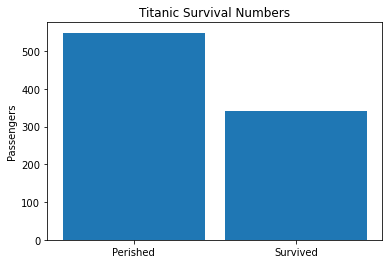

In [7]:
counts = df['Survived'].value_counts()
w=.35

plt.bar(x=[0,.4],height=counts,width=w)
plt.xticks([0,.4], ['Perished','Survived'])
plt.title('Titanic Survival Numbers')
plt.ylabel('Passengers')
plt.show()

In [8]:
means = df.mean()
means

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [9]:
averages = df.groupby(df['Survived']).mean()
averages

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [10]:
mean = pd.DataFrame([means], index = ['Total'])
averages = pd.concat([averages,mean])
averages

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887,NaN
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408,NaN
Total,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838


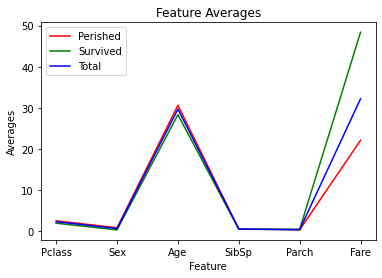

In [16]:
#feats = [df['Pclass'],df['Sex'].df['Age'],df['SibSp'],df['Parch'],df['Fare']]
averages = averages.drop('Survived',1)
plt.plot(averages.loc[0,:],color='r',label='Perished')
plt.plot(averages.loc[1,:],color='g',label='Survived')
plt.plot(averages.loc['Total',:],color='b',label='Total')
plt.xlabel('Feature')
plt.ylabel('Averages')
plt.title('Feature Averages')
plt.legend()
plt.show()

<ipython-input-58-c6fc93fbd9ea>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


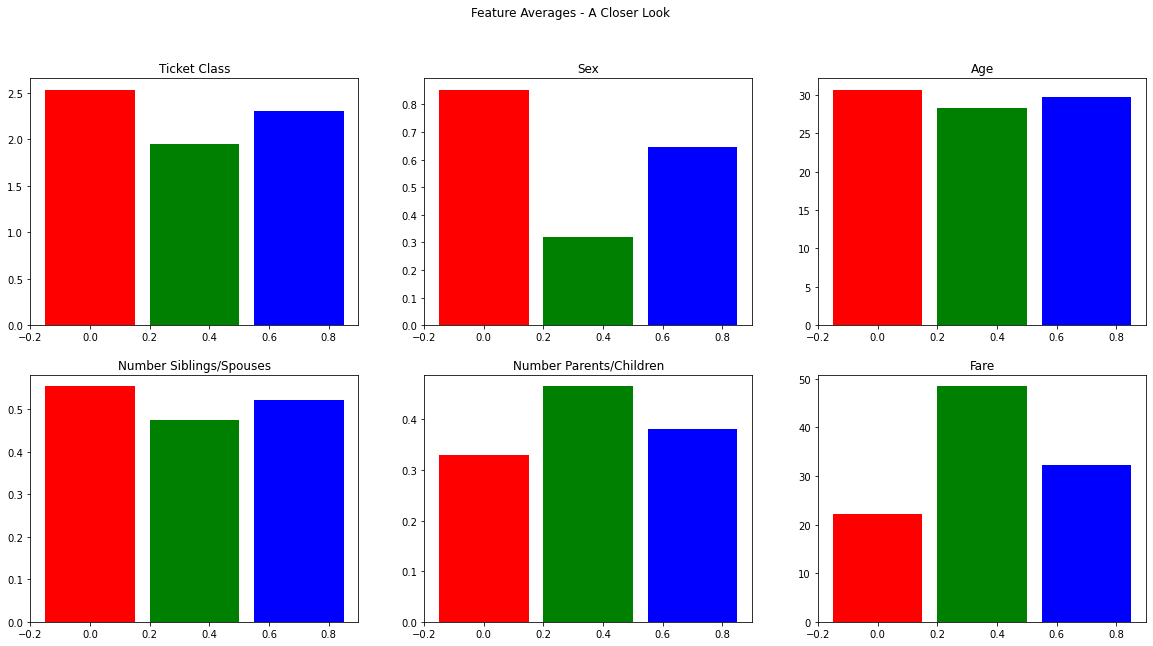

In [58]:
w=.3

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

avg = averages.loc[:,'Pclass']
ax[0,0].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[0,0].title.set_text('Ticket Class')

avg = averages.loc[:,'Sex']
ax[0,1].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[0,1].title.set_text('Sex')

avg = averages.loc[:,'Age']
ax[0,2].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[0,2].title.set_text('Age')

avg = averages.loc[:,'SibSp']
ax[1,0].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[1,0].title.set_text('Number Siblings/Spouses')

avg = averages.loc[:,'Parch']
ax[1,1].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[1,1].title.set_text('Number Parents/Children')

avg = averages.loc[:,'Fare']
ax[1,2].bar(x=[0,.35,.7],height=avg,width=w,color=['r','g','b'])
ax[1,2].title.set_text('Fare')

fig.suptitle("Feature Averages - A Closer Look")
fig.show()

In [24]:
corr = df.corr()

corr['Survived']

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

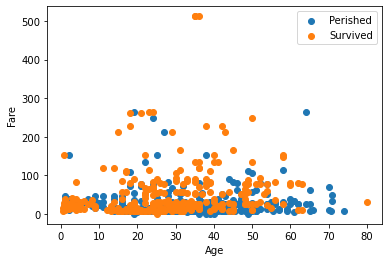

In [25]:
#Helpful code found at:
#https://www.kite.com/python/answers/how-to-color-a-scatter-plot-by-category-using-matplotlib-in-python

live = {1: 'Survived',0: 'Perished'}
df.Survived = [live[item] for item in df.Survived]
        
groups = df.groupby('Survived')

for name, group in groups:
    plt.scatter(group['Age'], group['Fare'], label=name)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()